In [1]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [2]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [3]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
os.chdir("C:/Users/A/Desktop/Bioactive/Clintox")

In [5]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original_data.csv',index_col=0)

#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(6313, 2851)


,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,30.2956,50.4319,0.673236,1.120709,0.086667,45.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9874,360.86,7.844783,31.0513,51.3488,0.675028,1.116278,0.086667,46.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9879,531.48,8.304375,43.4548,72.1164,0.678981,1.126819,0.063492,64.0,36.0,17.0,...,0.0,2.5,8.5,6.0,30.0,0.833333,6.0,0.166667,28.18004,6.903935


In [7]:
col_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)

In [8]:
X_NAomit_data

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,30.2956,50.4319,0.673236,1.120709,0.086667,45.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9874,360.86,7.844783,31.0513,51.3488,0.675028,1.116278,0.086667,46.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9879,531.48,8.304375,43.4548,72.1164,0.678981,1.126819,0.063492,64.0,36.0,17.0,...,0.0,2.5,8.5,6.0,30.0,0.833333,6.0,0.166667,28.18004,6.903935


In [9]:
threshold = 0.99  # 如果列中 0 的比例超过 90%，则移除该列
non_zero_threshold = X_NAomit_data.shape[0] * (1 - threshold)
X_NAomit_data =X_NAomit_data.loc[:, (X_NAomit_data != 0).sum(axis=0) > non_zero_threshold]

In [10]:
X_NAomit_data 

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,30.2956,50.4319,0.673236,1.120709,0.086667,45.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9874,360.86,7.844783,31.0513,51.3488,0.675028,1.116278,0.086667,46.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9879,531.48,8.304375,43.4548,72.1164,0.678981,1.126819,0.063492,64.0,36.0,17.0,...,3.5,2.5,8.5,6.0,30.0,0.833333,6.0,0.166667,28.18004,6.903935


In [11]:
X=np.array(X_NAomit_data)
X

array([[1.81170000e+02, 9.05850000e+00, 1.29034000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.43560000e+02, 2.79808696e+01, 2.43753000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.85780000e+02, 2.11208696e+01, 2.16707000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.31480000e+02, 8.30437500e+00, 4.34548000e+01, ...,
        1.66666667e-01, 2.81800396e+01, 6.90393505e+00],
       [4.64150000e+02, 1.40651515e+01, 1.77674000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.10970000e+02, 1.23300000e+01, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [12]:
X_NAomit_data 

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,30.2956,50.4319,0.673236,1.120709,0.086667,45.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9874,360.86,7.844783,31.0513,51.3488,0.675028,1.116278,0.086667,46.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9879,531.48,8.304375,43.4548,72.1164,0.678981,1.126819,0.063492,64.0,36.0,17.0,...,3.5,2.5,8.5,6.0,30.0,0.833333,6.0,0.166667,28.18004,6.903935


In [13]:
Raw_data

,smiles,Tox,Canonical_smiles
mol_id,,,
TOX1002,CN(N=O)c1ccc([N+](=O)[O-])cc1,1.0,CN(N=O)c1ccc([N+](=O)[O-])cc1
TOX10047,Brc1cc(Br)c(Oc2cc(Br)c(Br)cc2Br)cc1Br,0.0,Brc1cc(Br)c(Oc2cc(Br)c(Br)cc2Br)cc1Br
TOX10056,Brc1ccc(Oc2ccc(Br)cc2Br)c(Br)c1,1.0,Brc1ccc(Oc2ccc(Br)cc2Br)c(Br)c1
TOX1006,CN(N=O)C(N)=O,1.0,CN(N=O)C(N)=O
TOX10060,CC(C)(Cl)Cl,0.0,CC(C)(Cl)Cl
...,...,...,...
TOX9869,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O,1.0,CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O
TOX9874,CC(C)OC(=O)C(C)(C)Oc1ccc(C(=O)c2ccc(Cl)cc2)cc1,0.0,CC(C)OC(=O)C(C)(C)Oc1ccc(C(=O)c2ccc(Cl)cc2)cc1
TOX9879,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,1.0,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...


In [14]:
y=Raw_data['Tox']

In [15]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [16]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1137820361567492, tolerance: 0.1102816039603959
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18714544593092342, tolerance: 0.1102816039603959
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22305901376000747, tolerance: 0.1102816039603959
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_c

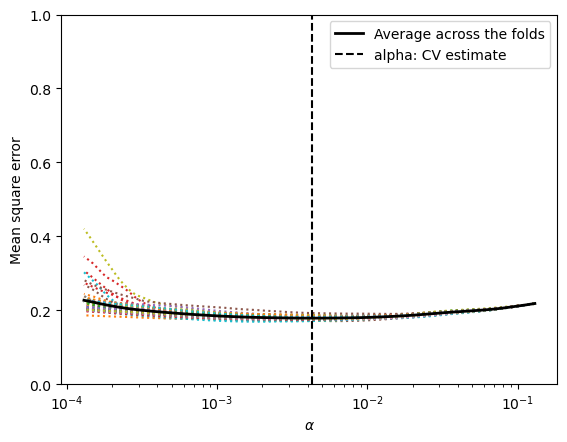

In [17]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [18]:
lasso.alpha_

0.0042585209945300035

In [19]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [20]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.389e+02, tolerance: 1.379e-01
  model = cd_fast.enet_coordinate_descent(


(6313, 222)

In [21]:
X_NAomit_data

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,12.9034,22.9535,0.645170,1.147675,0.166667,20.0,13.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10047,643.56,27.980870,24.3753,24.3350,1.059796,1.058043,0.116959,23.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10056,485.78,21.120870,21.6707,24.6518,0.942204,1.071817,0.132353,23.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX1006,103.10,8.591667,6.6875,14.3289,0.557292,1.194075,0.285714,12.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX10060,112.99,10.271818,7.7614,12.5488,0.705582,1.140800,0.400000,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,30.2956,50.4319,0.673236,1.120709,0.086667,45.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9874,360.86,7.844783,31.0513,51.3488,0.675028,1.116278,0.086667,46.0,25.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000
TOX9879,531.48,8.304375,43.4548,72.1164,0.678981,1.126819,0.063492,64.0,36.0,17.0,...,3.5,2.5,8.5,6.0,30.0,0.833333,6.0,0.166667,28.18004,6.903935


In [22]:
lsvc

Lasso(alpha=0.0042585209945300035)

In [23]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,-0.000232
AMW,0.005675
Sp,-0.000000
Si,-0.000330
Mp,0.000000
...,...
s34_relSize,-0.000000
s34_phSize,0.000000
s34_phRelSize,0.000000
chiralMoment,0.006112


In [24]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
MW,-0.000232
AMW,0.005675
Si,-0.000330
nBT,-0.000034
RBN,-0.004073


In [25]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,MW,AMW,Si,nBT,RBN,H%,C%,N%,X%,max_conj_path,...,maxDistfromCC,nLevel1,nLevel7,s2_pathLength,s3_pathLength,s3_numSharedNeighbors,s4_numRotBonds,s4_numAroBonds,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,181.17,9.058500,22.9535,20.0,3.0,35.000000,35.000000,15.000000,0.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX10047,643.56,27.980870,24.3350,24.0,2.0,17.391304,52.173913,0.000000,26.086957,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX10056,485.78,21.120870,24.6518,24.0,2.0,26.086957,52.173913,0.000000,17.391304,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX1006,103.10,8.591667,14.3289,11.0,1.0,41.666667,16.666667,25.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX10060,112.99,10.271818,12.5488,10.0,0.0,54.545455,27.272727,0.000000,18.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,361.85,8.041111,50.4319,46.0,7.0,44.444444,42.222222,2.222222,2.222222,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX9874,360.86,7.844783,51.3488,47.0,7.0,45.652174,43.478261,0.000000,2.173913,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
TOX9879,531.48,8.304375,72.1164,68.0,7.0,43.750000,40.625000,6.250000,3.125000,6.0,...,13.0,3.5,2.0,3.0,6.0,0.0,3.5,6.0,28.18004,6.903935


In [26]:
Lasso_data.to_csv('./Lasso_data.csv',encoding='utf-8')

In [27]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Lasso_Scaler_transformer.pkl')

X_scaled_data

,MW,AMW,Si,nBT,RBN,H%,C%,N%,X%,max_conj_path,...,maxDistfromCC,nLevel1,nLevel7,s2_pathLength,s3_pathLength,s3_numSharedNeighbors,s4_numRotBonds,s4_numAroBonds,chiralMoment,chiralPhMoment
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX1002,0.086499,0.036167,0.087824,0.083333,0.06,0.408333,0.540909,0.150000,0.000000,0.15,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX10047,0.318822,0.178353,0.093218,0.100000,0.04,0.202899,0.806324,0.000000,0.313043,0.15,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX10056,0.239547,0.126806,0.094455,0.100000,0.04,0.304348,0.806324,0.000000,0.208696,0.15,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX1006,0.047274,0.032659,0.054146,0.045833,0.02,0.486111,0.257576,0.250000,0.000000,0.00,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX10060,0.052243,0.045284,0.047195,0.041667,0.00,0.636364,0.421488,0.000000,0.218182,0.00,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOX9869,0.177280,0.028522,0.195124,0.191667,0.14,0.518519,0.652525,0.022222,0.026667,0.20,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX9874,0.176782,0.027047,0.198704,0.195833,0.14,0.532609,0.671937,0.000000,0.026087,0.35,...,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000
TOX9879,0.262509,0.030501,0.279800,0.283333,0.14,0.510417,0.627841,0.062500,0.037500,0.15,...,0.309524,0.875,0.172414,0.176471,0.142857,0.0,0.109375,0.168704,0.169965,0.1317


In [28]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [29]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [30]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Tox'].values

## 1.1 DT

In [31]:
clf=DecisionTreeClassifier(random_state=0)

In [32]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676524,0.001819
Accuracy_train,0.997228,0.000062
F1 Score,0.507439,0.002759
Precision,0.498310,0.002684
Recall,0.517412,0.003642
Roc_auc,0.635220,0.002051


In [33]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 03:15:43,504] A new study created in memory with name: no-name-e6f84262-8d74-4b46-bf3a-d9a0ef8b2646
[I 2024-11-14 03:15:48,085] Trial 0 finished with value: 0.7172978331219031 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.7172978331219031.
[I 2024-11-14 03:15:48,597] Trial 1 finished with value: 0.7014101960843362 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.7172978331219031.
[I 2024-11-14 03:15:49,132] Trial 2 finished with value: 0.7033418156403201 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.7172978331219031.
[I 2024-11-14 03:15:49,544] Trial 3 finished with value: 0.7131798487489226 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.7172978331219031.
[I 2024-11-14 03:15:50,085] Trial 4 finished with value: 0.711357633386159

In [34]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 16, 'min_samples_split': 7}


In [35]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.717947,0.001515
Accuracy_train,0.730833,0.000861
F1 Score,0.412695,0.006574
Precision,0.632603,0.006607
Recall,0.311455,0.007911
Roc_auc,0.684811,0.002400


In [36]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676524  0.001819  0.717947  0.001515
Accuracy_train  0.997228  0.000062  0.730833  0.000861
F1 Score        0.507439  0.002759  0.412695  0.006574
Precision       0.498310  0.002684  0.632603  0.006607
Recall          0.517412  0.003642  0.311455  0.007911
Roc_auc         0.635220  0.002051  0.684811  0.002400

## 1.2 LR

In [37]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [38]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.749691,0.001203
Accuracy_train,0.763056,0.000319
F1 Score,0.508199,0.003093
Precision,0.692420,0.003131
Recall,0.401917,0.003410
Roc_auc,0.758669,0.001662


In [39]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 03:16:59,706] A new study created in memory with name: no-name-85765c20-f543-4736-8c88-6c594cddf4e2
[I 2024-11-14 03:17:06,934] Trial 0 finished with value: 0.7484244240250052 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.7484244240250052.
[I 2024-11-14 03:17:09,586] Trial 1 finished with value: 0.7367964735687047 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.7484244240250052.
[I 2024-11-14 03:17:11,357] Trial 2 finished with value: 0.7086329432224988 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.7484244240250052.
[I 2024-11-14 03:17:18,337] Trial 3 finished with value: 0.7514654816532468 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.751465481

In [40]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 330.05225194642543, 'l1_ratio': 0.6550099061971694, 'max_iter': 972}


In [41]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.761508,0.001450
Accuracy_train,0.787854,0.000469
F1 Score,0.562458,0.003136
Precision,0.687934,0.003432
Recall,0.476309,0.003750
Roc_auc,0.769144,0.001750


In [42]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.749691  0.001203  0.761508  0.001450
Accuracy_train  0.763056  0.000319  0.787854  0.000469
F1 Score        0.508199  0.003093  0.562458  0.003136
Precision       0.692420  0.003131  0.687934  0.003432
Recall          0.401917  0.003410  0.476309  0.003750
Roc_auc         0.758669  0.001662  0.769144  0.001750

## 1.3 RF

In [43]:
clf=RandomForestClassifier(random_state=0)

In [44]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.761365,0.001474
Accuracy_train,0.997173,0.000062
F1 Score,0.554741,0.003600
Precision,0.695072,0.003226
Recall,0.462143,0.004124
Roc_auc,0.771695,0.002005


In [45]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-11-14 04:00:24,494] A new study created in memory with name: no-name-60e82458-6028-4862-b2d4-6a5d6777a223
[I 2024-11-14 04:00:40,466] Trial 0 finished with value: 0.6778077251732537 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.6778077251732537.
[I 2024-11-14 04:00:56,401] Trial 1 finished with value: 0.6778077251732537 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.6778077251732537.
[I 2024-11-14 04:01:33,397] Trial 2 finished with value: 0.6778077251732537 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.6778077251732537.
[I 2024-11-14 04:01:50,816] Trial 3 finished with value: 0.6778077251732537 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [46]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}


In [47]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetri

,Mean,Se
Accuracy_test,0.677808,0.000037
Accuracy_train,0.677808,0.000009
F1 Score,0.000000,0.000000
Precision,0.000000,0.000000
Recall,0.000000,0.000000
Roc_auc,0.500000,0.000000


In [48]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.761365  0.001474  0.677808  0.000037
Accuracy_train  0.997173  0.000062  0.677808  0.000009
F1 Score        0.554741  0.003600  0.000000  0.000000
Precision       0.695072  0.003226  0.000000  0.000000
Recall          0.462143  0.004124  0.000000  0.000000
Roc_auc         0.771695  0.002005  0.500000  0.000000

## 1.4 XGBoost

In [49]:
clf=xgb.XGBClassifier(random_state=0)

In [50]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.753604,0.001508
Accuracy_train,0.994056,0.000172
F1 Score,0.564906,0.003189
Precision,0.655269,0.003209
Recall,0.497004,0.003838
Roc_auc,0.752586,0.001800


In [51]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 04:35:21,584] A new study created in memory with name: no-name-660852b7-e659-4c50-8f59-d43d9169f6a7
C:\Users\A\AppData\Local\Temp\ipykernel_95716\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_95716\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [52]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 5.270910186388237, 'alpha': 0.0018344291276285478, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.0201, 'n_estimators': 692}


In [53]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.767607,0.001299
Accuracy_train,0.952629,0.000272
F1 Score,0.574421,0.002992
Precision,0.700605,0.003022
Recall,0.487367,0.003690
Roc_auc,0.776338,0.001783


In [54]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.753604  0.001508  0.767607  0.001299
Accuracy_train  0.994056  0.000172  0.952629  0.000272
F1 Score        0.564906  0.003189  0.574421  0.002992
Precision       0.655269  0.003209  0.700605  0.003022
Recall          0.497004  0.003838  0.487367  0.003690
Roc_auc         0.752586  0.001800  0.776338  0.001783

# 2. MLREM

In [90]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

In [91]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,66.871159,348.869542,135.0,383.0,2886.0,5576.0,10547.0,5729.0,4739.692713,...,90.763661,139.049917,75.680233,63.202194,1.899093,36.892542,0.0,139.54,160.947217,291.295681
Ma_2019_U,244.23,0.000000,340.039426,118.0,295.0,2084.0,4432.0,8734.0,2194.0,3416.557603,...,139.839496,139.049917,0.000000,48.373245,46.279992,36.205320,0.0,124.78,146.060780,262.840532
Ma_2019_C,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Ma_2019_G,283.28,71.547747,387.546658,144.0,446.0,3270.0,6542.0,12768.0,6578.0,5547.544286,...,117.471961,139.049917,32.387883,80.922082,45.054770,36.939118,0.0,159.51,178.957968,301.046512
Ma_2019_dA,251.28,63.146800,315.599992,128.0,336.0,2584.0,4822.0,8812.0,5068.0,4099.715332,...,52.221046,96.366574,75.680233,63.202194,1.899093,36.335611,0.0,119.31,118.263874,281.544850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Tang_2019_DideoxyC,211.25,0.000000,253.494297,103.0,213.0,1585.0,2963.0,5062.0,1633.0,2398.199373,...,59.519699,53.683231,0.000000,67.057867,3.124314,34.619300,0.0,90.37,75.580531,250.166113
Peters_2014_3,268.26,66.871159,369.000658,135.0,383.0,2886.0,5763.0,11275.0,5729.0,4739.692713,...,100.945467,139.049917,32.387883,87.641582,27.044020,36.892542,0.0,133.49,146.060780,284.468439


In [92]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.181294,0.193207,0.036281,0.026667,0.030815,0.037803,0.044265,0.024087,0.024617,...,0.176802,0.999046,0.285905,0.104723,0.015761,0.446054,0.0,0.472652,0.769847,0.069993
Ma_2019_U,0.075722,0.000000,0.175319,0.017007,0.012863,0.011819,0.021252,0.029633,0.003299,0.010706,...,0.401921,0.999046,0.000000,0.031193,0.384100,0.311208,0.0,0.330770,0.665700,0.021569
Ma_2019_C,0.073472,0.000000,0.134701,0.017007,0.012863,0.011819,0.018475,0.023484,0.003299,0.010706,...,0.389042,0.999046,0.000000,0.123842,0.025930,0.311208,0.0,0.388926,0.769847,0.033187
Ma_2019_G,0.165381,0.193972,0.271557,0.046485,0.036549,0.039910,0.051778,0.062188,0.029080,0.033111,...,0.299317,0.999046,0.122355,0.192589,0.373931,0.455193,0.0,0.664616,0.895853,0.086587
Ma_2019_dA,0.091909,0.171197,0.125811,0.028345,0.019294,0.023662,0.026894,0.030263,0.020200,0.017889,...,0.000000,0.666030,0.285905,0.104723,0.015761,0.336774,0.0,0.278189,0.471230,0.053399


In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448